<h1 align="center"><font size="5">Classification with Python</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
import urllib.request
directory="G:\ML\Python scripts\Data files\\"
file_name="loan_train.csv"
file_name=directory+file_name
url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
# File already downloaded to this pc.
#urllib.request.urlretrieve(url,file_name)
#
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

### Load Data From CSV File  

In [3]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# Already installed
#!conda install -c anaconda seaborn -y

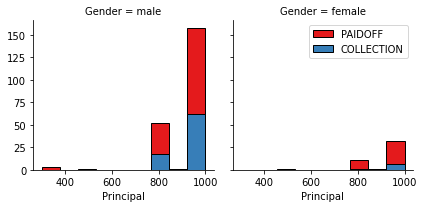

In [8]:
import seaborn as sns
# https://www.tutorialspoint.com/seaborn/seaborn_facet_grid.htm
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

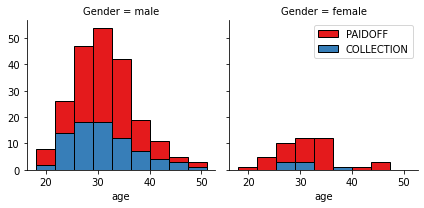

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

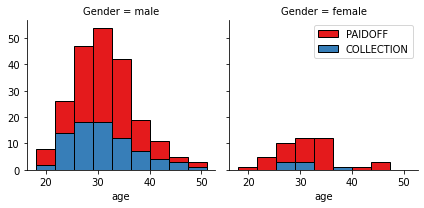

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

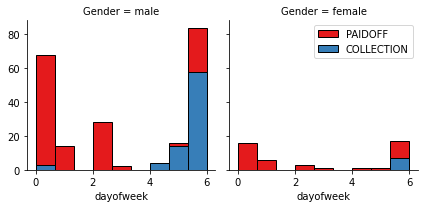

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?
_Sklearn_ _Decision_ _Trees_ do not handle categorical features such as Sex or BP variables. 
<br>pandas.get_dummies()  - convert categorical variable into dummy - indicator variables.
<br> <a href=https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970>What is One-Hot Encoding and how to use Pandas get_dummies function</a>


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection
Lets define feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

Lets convert COLLECTION to 0 and PAIDOFF to 1:

In [21]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [22]:
y = df['loan_status'].values
type(y)

numpy.ndarray

In [23]:
y.shape

(346,)

In [24]:
y[1:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor (KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Evaluation using jaccard score function to find best k 
Jaccard_score is given by <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score"> "metrics.accuracy_score", </a>. Acording to that site, in binary and multiclass classification, accuracy_score is equal to the jaccard_score function.

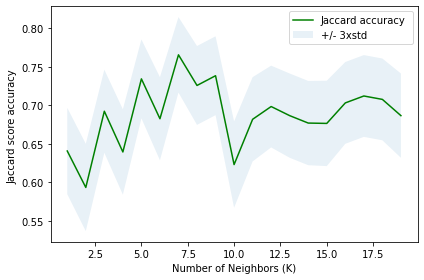

In [26]:
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
# Let us calculate the accuracy of KNN for different Ks.

Ks = 20
Jaccard = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):   
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    Jaccard[n-1] = jaccard_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),Jaccard,'g')
plt.fill_between(range(1,Ks),Jaccard - 1 * std_acc,Jaccard + 1 * std_acc, alpha=0.10)
plt.legend(('Jaccard accuracy ', '+/- 3xstd'))
plt.ylabel('Jaccard score accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Evaluation  using jaccard score at best k 

In [27]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
# Predicting - we use the model to predict the test set:
yhat_test = neigh.predict(X_test)
jaccard=jaccard_score(y_test, yhat_test)
# yhat_train = neigh.predict(X_train)
# acc_train=metrics.accuracy_score(y_train, yhat_train)
# Accuracy evaluation
# print("Train set Accuracy: ", acc_train)
print("Jaccard test set tccuracy: ", jaccard)

Jaccard test set tccuracy:  0.765625


### Evaluation using F1_score
Second evaluation, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score"> "F1_score"</a>. Compute the F1 score:
<br>F1 = 2 * (precision * recall) / (precision + recall) <br>
I use - average='weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 

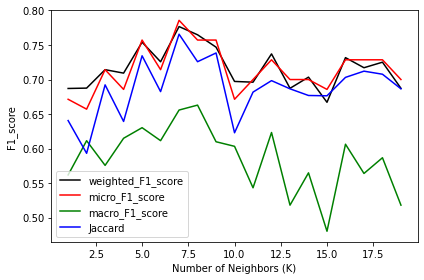

In [28]:
from sklearn.metrics import f1_score

Ks = 20
weighted_F1_score = np.zeros((Ks-1))
micro_F1_score = np.zeros((Ks-1))
macro_F1_score = np.zeros((Ks-1))
#none_F1_score = np.zeros((Ks-1))

for n in range(1,Ks):   
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    weighted_F1_score[n-1] = f1_score(y_test, yhat,average='weighted')
    micro_F1_score[n-1] = f1_score(y_test, yhat,average='micro')
    macro_F1_score[n-1] = f1_score(y_test, yhat,average='macro')

plt.plot(range(1,Ks),weighted_F1_score,'k')
plt.plot(range(1,Ks),micro_F1_score,'r')
plt.plot(range(1,Ks),macro_F1_score,'g')
plt.plot(range(1,Ks),Jaccard,'b')

plt.legend(('weighted_F1_score', 'micro_F1_score','macro_F1_score','Jaccard'))
plt.ylabel('F1_score ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
k = 7
# Train and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
# Predicting - we use the model to predict the test set:
yhat = neigh.predict(X_test)

# F1_score evaluation
F1_score_w=f1_score(y_test, yhat,average='weighted')
print("Test set F1_score (weighted): ", F1_score_w)
print("Test set F1_score (micro): ", f1_score(y_test, yhat,average='micro'))
print("Test set F1_score (macro): ", f1_score(y_test, yhat,average='macro'))

Test set F1_score (weighted):  0.7766540244416351
Test set F1_score (micro):  0.7857142857142857
Test set F1_score (macro):  0.655850540806293


In [30]:
# Building the report matrix a - summary of this project.
# 
d=[]
d = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],'Jaccard':pd.Series(['-','-','-','-']),
   'F1-score(w)':pd.Series(['-','-','-','-']),
   'LogLoss':pd.Series(['-','-','-','-'])}
Report = pd.DataFrame(d)
Report = Report.set_index('Algorithm')
Report.at['KNN', 'Jaccard'] = ('{:,.2f}'.format(jaccard))
Report.at['KNN', 'F1-score(w)'] = ('{:,.2f}'.format(F1_score_w))
print(Report)

                   Jaccard F1-score(w) LogLoss
Algorithm                                     
KNN                   0.77        0.78       -
Decision Tree            -           -       -
SVM                      -           -       -
LogisticRegression       -           -       -


# Decision Tree

In [31]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus

### Evaluation - finding best jaccard and F1 score

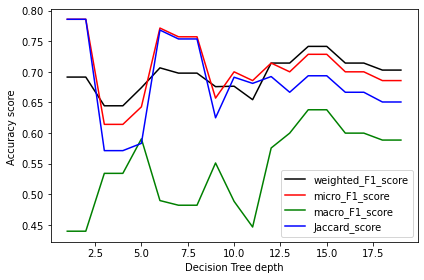

In [32]:
# Here we scan the Jaccard and F1 score as a function of DecisionTree "max-depth"
m_d=20

weighted_F1_score = np.zeros((m_d-1))
micro_F1_score = np.zeros((m_d-1))
macro_F1_score = np.zeros((m_d-1))
Jaccard_score = np.zeros((m_d-1))

for n in range(1,m_d):   
    #Train Model and Predict  
    Loan_Worthy_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    Loan_Worthy_Tree.fit(X_train,y_train)
    # Evaluate  
    yhat=Loan_Worthy_Tree.predict(X_test)
    Jaccard_score[n-1]=jaccard_score(y_test, yhat)
    weighted_F1_score[n-1] = f1_score(y_test, yhat, average='weighted')
    micro_F1_score[n-1] = f1_score(y_test, yhat, average='micro')
    macro_F1_score[n-1] = f1_score(y_test, yhat, average='macro')  

plt.plot(range(1,m_d),weighted_F1_score,'k')
plt.plot(range(1,m_d),micro_F1_score,'r')
plt.plot(range(1,m_d),macro_F1_score,'g')
plt.plot(range(1,m_d),Jaccard_score,'b')
plt.legend(('weighted_F1_score', 'micro_F1_score','macro_F1_score','Jaccard_score'))
plt.ylabel('Accuracy score ')
plt.xlabel("Decision Tree depth")
plt.tight_layout()
plt.show()

Jaccard_score_= 0.6935483870967742
weighted_F1_score_= 0.7414965986394557
micro_F1_score_ = 0.7285714285714285
macro_F1_score_ =  0.638095238095238


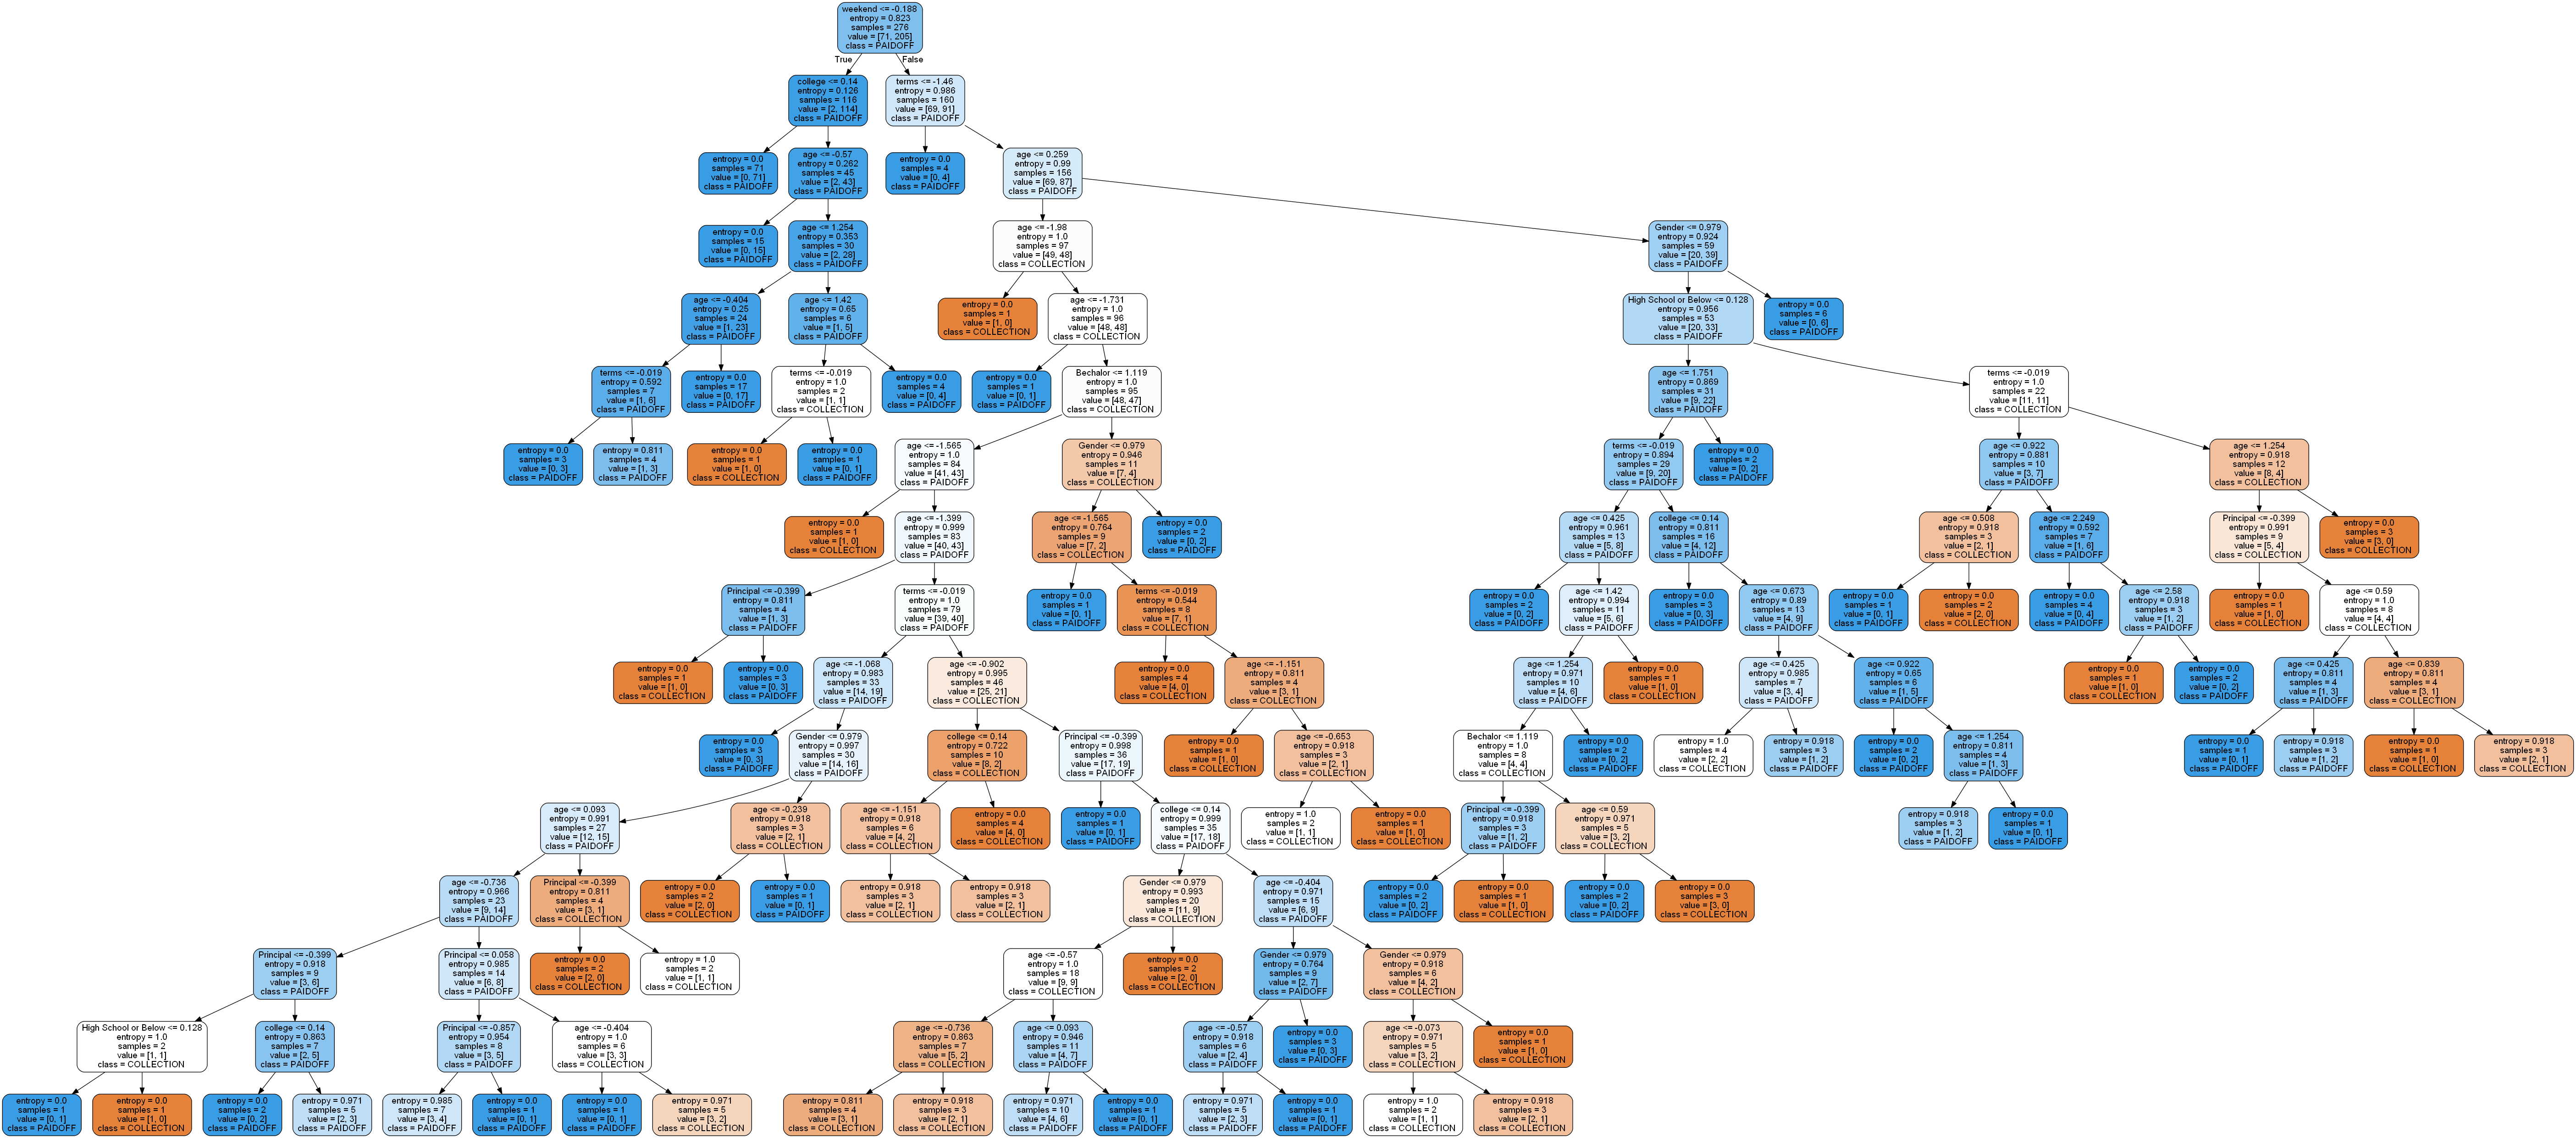

In [33]:
# Result at the best accuracy, max_depth = 15
#Train and Predict  
Loan_Worthy_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
Loan_Worthy_Tree.fit(X_train,y_train)

# Evaluate using jaccard and F1_score
yhat=Loan_Worthy_Tree.predict(X_test)
Jaccard_score_= jaccard_score(y_test, yhat)
print("Jaccard_score_=", Jaccard_score_)
weighted_F1_score_ =f1_score(y_test, yhat, average='weighted')
print("weighted_F1_score_=", weighted_F1_score_ )
print("micro_F1_score_ =", f1_score(y_test, yhat, average='micro'))
print("macro_F1_score_ = ",f1_score(y_test, yhat, average='macro'))  
# Create DOT data
dot_data = tree.export_graphviz(Loan_Worthy_Tree, out_file=None,
                                filled=True, rounded=True,
                                feature_names=Feature.columns.values,  
                                class_names=['COLLECTION ','PAIDOFF'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [34]:
# Adding Decision-Tree's accuracy results to summary Report.
Report.at['Decision Tree', 'Jaccard'] = ('{:,.2f}'.format(Jaccard_score_))
Report.at['Decision Tree', 'F1-score(w)'] = ('{:,.2f}'.format(weighted_F1_score_))
Report

,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.77,0.78,-
Decision Tree,0.69,0.74,-
SVM,-,-,-
LogisticRegression,-,-,-


# Support Vector Machine

In [35]:
from sklearn import svm
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
# print(y_test[0:5], yhat[0:5])
F1_rbf=f1_score(y_test, yhat, average='weighted')
JS_rbf=jaccard_score(y_test, yhat)
print("rbf_f1 score=",F1_rbf) 
print("rbf Jaccard_score=",JS_rbf)
RMS=np.sqrt(np.power(F1_rbf,2)+np.power(F1_rbf,2))/np.sqrt(2)
print ("rbf RMS accuracy - %.2f" % RMS)

rbf_f1 score= 0.7275882012724117
rbf Jaccard_score= 0.7272727272727273
rbf RMS accuracy - 0.73


In [36]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
# print(y_test[0:5], yhat[0:5])
F1_lin=f1_score(y_test, yhat, average='weighted')
JS_lin=jaccard_score(y_test, yhat)
print("lin_f1 score=",F1_lin) 
print("lin Jaccard_score=",JS_lin)
RMS=np.sqrt(np.power(F1_lin,2)+np.power(F1_lin,2))/np.sqrt(2)
print ("linear RMS accuracy- %.2f" % RMS)

lin_f1 score= 0.6914285714285714
lin Jaccard_score= 0.7857142857142857
linear RMS accuracy- 0.69


In [37]:
clf = svm.SVC(kernel='poly',degree=3)
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)

F1_poly=f1_score(y_test, yhat, average='weighted')
JS_poly=jaccard_score(y_test, yhat)
print("poly_f1 score=",F1_poly) 
print("poly Jaccard_score=",JS_poly)
RMS=np.sqrt(np.power(F1_poly,2)+np.power(F1_poly,2))/np.sqrt(2)
print ("poly RMS accuracy - %.2f" % RMS)

poly_f1 score= 0.7064793130366899
poly Jaccard_score= 0.7681159420289855
poly RMS accuracy - 0.71


In [38]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)

F1_sigmoid=f1_score(y_test, yhat, average='weighted')
JS_sigmoid=jaccard_score(y_test, yhat)
print("sigmoid_f1 score=",F1_sigmoid) 
print("sigmoid Jaccard_score=",JS_sigmoid)
RMS=np.sqrt(np.power(F1_poly,2)+np.power(F1_sigmoid,2))/np.sqrt(2)
print ("sigmoid RMS accuracy - %.2f" % RMS)

sigmoid_f1 score= 0.6892857142857144
sigmoid Jaccard_score= 0.7391304347826086
sigmoid RMS accuracy - 0.70


In [39]:
# Adding SVM's accuracy results to summary Report.
Report.at['SVM', 'Jaccard'] = ('{:,.2f}'.format(JS_rbf))
Report.at['SVM', 'F1-score(w)'] = ('{:,.2f}'.format(F1_rbf))
Report

,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.77,0.78,-
Decision Tree,0.69,0.74,-
SVM,0.73,0.73,-
LogisticRegression,-,-,-


# Logistic Regression

#### "sag" Logistic-Regression solver

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.000005, solver = 'sag').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob2 = LR.predict_proba(X_test)
lg_ls=log_loss(y_test,yhat_prob2)
print ("LogLoss - %.2f" % lg_ls)
ja_LR=jaccard_score(y_test, yhat)
F1_LR=f1_score(y_test, yhat, average='weighted')
print("jaccard_score - %.2f" % ja_LR)
print("f1 score - %.2f" % F1_LR) 
RMS=np.sqrt(np.power(ja_LR,2)+np.power(F1_LR,2)+np.power(lg_ls,2))/np.sqrt(3)
print ("RMS - %.2f" % RMS)
# Adding Logistic-Regression's accuracy results to summary Report.
Report.at['LogisticRegression', 'Jaccard'] = ('{:,.2f}'.format(ja_LR))
Report.at['LogisticRegression', 'F1-score(w)'] = ('{:,.2f}'.format(F1_LR))
Report.at['LogisticRegression', 'LogLoss'] = ('{:,.2f}'.format(lg_ls))

LogLoss - 0.53
jaccard_score - 0.79
f1 score - 0.69
RMS - 0.68


#### "liblinear" Logistic-Regression solver

In [41]:
LR = LogisticRegression(C=0.000001, solver = 'liblinear').fit(X_train,y_train)
yhat_prob2 = LR.predict_proba(X_test)
LR_LL=log_loss(y_test,yhat_prob2)
yhat = LR.predict(X_test)

lg_ls=log_loss(y_test,yhat_prob2)
print ("LogLoss - %.2f" % lg_ls)
ja_LR=jaccard_score(y_test, yhat)
F1_LR=f1_score(y_test, yhat, average='weighted')
print("jaccard_score - %.2f" % ja_LR)
print("f1 score - %.2f" % F1_LR) 
RMS=np.sqrt(np.power(ja_LR,2)+np.power(F1_LR,2)+np.power(lg_ls,2))/np.sqrt(3)
print ("RMS - %.2f" % RMS)



LogLoss - 0.69
jaccard_score - 0.61
f1 score - 0.64
RMS - 0.65


#### "newton-cg" Logistic-Regression solver

In [42]:
LR = LogisticRegression(C=0.000001, solver = 'newton-cg').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob2 = LR.predict_proba(X_test)
lg_ls=log_loss(y_test,yhat_prob2)
print ("LogLoss - %.2f" % lg_ls)
ja_LR=jaccard_score(y_test, yhat)
F1_LR=f1_score(y_test, yhat, average='weighted')
print("jaccard_score - %.2f" % ja_LR)
print("f1 score - %.2f" % F1_LR) 
RMS=np.sqrt(np.power(ja_LR,2)+np.power(F1_LR,2)+np.power(lg_ls,2))/np.sqrt(3)
print ("RMS - %.2f" % RMS)

LogLoss - 0.52
jaccard_score - 0.79
f1 score - 0.69
RMS - 0.68


#### "lbfgs" Logistic-Regression solver

In [43]:
LR = LogisticRegression(C=0.000001, solver = 'lbfgs').fit(X_train,y_train)
yhat_prob2 = LR.predict_proba(X_test)
yhat = LR.predict(X_test)
lg_ls=log_loss(y_test,yhat_prob2)
print ("LogLoss - %.2f" % lg_ls)
ja_LR=jaccard_score(y_test, yhat)
F1_LR=f1_score(y_test, yhat, average='weighted')
print("jaccard_score - %.2f" % ja_LR)
print("f1 score - %.2f" % F1_LR) 
RMS=np.sqrt(np.power(ja_LR,2)+np.power(F1_LR,2)+np.power(lg_ls,2))/np.sqrt(3)
print ("RMS - %.2f" % RMS) 

LogLoss - 0.52
jaccard_score - 0.79
f1 score - 0.69
RMS - 0.68


In [44]:
print("Results of the train/test split")
Report

Results of the train/test split


,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.77,0.78,-
Decision Tree,0.69,0.74,-
SVM,0.73,0.73,-
LogisticRegression,0.79,0.69,0.53


# Model Evaluation using Test set

In [45]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [46]:
import urllib.request
directory="G:\ML\Python scripts\Data files\\"
file_name="loan_test.csv "
file_name=directory+file_name
# url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
# File already downloaded to this pc.
# urllib.request.urlretrieve(url,file_name)
#
## !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [47]:
test_df = pd.read_csv(file_name)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Convert to date time object

In [48]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [49]:
test_df.shape

(54, 10)

### Pre-Processing test data set:
- Weekend binarization to set a threshold value;
- Converting male to 0 and female to 1:


In [50]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


- Education, One Hot Encoding

In [51]:
test_B=[]
test_B = test_df[['Principal','terms','age','Gender','weekend']]
test_B = pd.concat([test_B,pd.get_dummies(test_df['education'])], axis=1)
test_B.drop(['Master or Above'], axis = 1,inplace=True)
test_B.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [52]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_test_B = test_df['loan_status'].values
type(y_test_B)

numpy.ndarray

Append, normalize, re-split

In [53]:
GT=Feature.append(test_B,ignore_index=True)
GT= preprocessing.StandardScaler().fit(GT).transform(GT)
GT_train=GT[0:Feature.shape[0]]
GT_test=GT[(Feature.shape[0]):(GT.shape[0])]
print ('GT_train:', GT_train.shape)
print ('GT_test:', GT_test.shape)

GT_train: (346, 8)
GT_test: (54, 8)


#### KNN model and evaluation

In [54]:
k = 7
# Train and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(GT_train,y)
# Predicting - we use the model to predict the test set:
y_hat = neigh.predict(GT_test)

F1_score_w_GT=f1_score(y_test_B, y_hat,average='weighted')
jaccard_GT=jaccard_score(y_test_B, y_hat)

print("Test set F1_score (weighted): ", F1_score_w_GT)
print("Jaccard test set tccuracy: ", jaccard_GT)

Test set F1_score (weighted):  0.683127572016461
Jaccard test set tccuracy:  0.7307692307692307


#### Building the report matrix, a summary of this project.

In [55]:
d2=[]
d2 = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
    'Jaccard':pd.Series(['-','-','-','-']),
    'F1-score(w)':pd.Series(['-','-','-','-']),
    'LogLoss':pd.Series(['-','-','-','-'])}
Report_GT = pd.DataFrame(d2)
Report_GT = Report_GT.set_index('Algorithm')
Report_GT.at['KNN', 'Jaccard'] = ('{:,.2f}'.format(jaccard_GT))
Report_GT.at['KNN', 'F1-score(w)'] = ('{:,.2f}'.format(F1_score_w_GT))
Report_GT

,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.73,0.68,-
Decision Tree,-,-,-
SVM,-,-,-
LogisticRegression,-,-,-


#### Decision Tree - model and evaluation 

In [56]:
# Result at the best accuracy, max_depth = 15
#Train and Predict  
Loan_Worthy_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
Loan_Worthy_Tree.fit(GT_train,y)

# Evaluate using jaccard and F1_score
y_hat=Loan_Worthy_Tree.predict(GT_test)
F1_score_w_GT=f1_score(y_test_B, y_hat,average='weighted')
jaccard_GT=jaccard_score(y_test_B, y_hat)
Report_GT.at['Decision Tree', 'Jaccard'] = ('{:,.2f}'.format(jaccard_GT))
Report_GT.at['Decision Tree', 'F1-score(w)'] = ('{:,.2f}'.format(F1_score_w_GT))
Report_GT

,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.73,0.68,-
Decision Tree,0.65,0.69,-
SVM,-,-,-
LogisticRegression,-,-,-


#### Support Vector Machine - model and evaluation.

In [57]:
clf = svm.SVC(kernel='rbf')
clf.fit(GT_train,y) 
y_hat = clf.predict(GT_test)

F1_score_w_GT=f1_score(y_test_B, y_hat,average='weighted')
jaccard_GT=jaccard_score(y_test_B, y_hat)
Report_GT.at['SVM', 'Jaccard'] = ('{:,.2f}'.format(jaccard_GT))
Report_GT.at['SVM', 'F1-score(w)'] = ('{:,.2f}'.format(F1_score_w_GT))
Report_GT

,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.73,0.68,-
Decision Tree,0.65,0.69,-
SVM,0.72,0.62,-
LogisticRegression,-,-,-


#### Logistic Regression - model and evaluation.

In [58]:
LR = LogisticRegression(C=0.000005, solver = 'sag').fit(GT_train,y)
y_hat_prob = LR.predict_proba(GT_test)
LR_LL=log_loss(y_test_B, y_hat_prob)
y_hat2 = LR.predict(GT_test)

F1_score_w_GT=f1_score(y_test_B, y_hat2,average='weighted')
jaccard_GT=jaccard_score(y_test_B, y_hat2)

Report_GT.at['LogisticRegression', 'Jaccard'] = ('{:,.2f}'.format(jaccard_GT))
Report_GT.at['LogisticRegression', 'F1-score(w)'] = ('{:,.2f}'.format(F1_score_w_GT))
Report_GT.at['LogisticRegression', 'LogLoss'] = ('{:,.2f}'.format(LR_LL))
print("Summary report")
Report_GT

Summary report


,Jaccard,F1-score(w),LogLoss
Algorithm,,,
KNN,0.73,0.68,-
Decision Tree,0.65,0.69,-
SVM,0.72,0.62,-
LogisticRegression,0.74,0.63,0.57


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>